In [4]:
# import libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

In [5]:
# loading data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# data cleaning
df['job_posted_date']= pd.to_datetime(df['job_posted_date'])

In [6]:
# Dataframe filtrato dai valori Nan
df[pd.notna(df['salary_year_avg'])]['salary_year_avg']

28        109500.0
77        140000.0
92        120000.0
100       228222.0
109        89000.0
            ...   
785624    139216.0
785641    150000.0
785648    221875.0
785682    157500.0
785692    157500.0
Name: salary_year_avg, Length: 22003, dtype: float64

# Calculate projected salary next year

In [7]:
df_salary= df[pd.notna(df['salary_year_avg'])].copy() # crea una singola colonna

def projected_salary(salary):
    return salary * 1.03

df_salary['salary_year_inflated']= df_salary['salary_year_avg'].apply(projected_salary)

"""""
df_salary['salary_year_inflated']= df_salary['salary_year_avg'].apply(lambda salary: salary* 1.03)

"""

df_salary[['salary_year_avg','salary_year_inflated'] ]

,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [8]:
# converire job_skills da str a lista
import ast 


In [9]:
def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)

df['job_skills']= df['job_skills'].apply(clean_list)

In [ ]:
df['job_skills']= df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

Senior roles assume 5%
Other roles assume 3%

In [ ]:
df_salary['salary_year_inflated']= df_salary['salary_year_avg'].apply(lambda salary: salary* 1.03)

df_salary[['salary_year_avg','salary_year_inflated'] ]

In [12]:
def projected_salary(row):
    if "Senior" in row['job_title_short']:
        return 1.05 * row['salary_year_avg']
    else:
        return 1.03 * row['salary_year_avg']

df_salary['salary_year_inflated']= df_salary.apply(projected_salary, axis=1)

df_salary[['job_title_short', 'salary_year_avg', 'salary_year_inflated']]

,job_title_short,salary_year_avg,salary_year_inflated
28,Data Scientist,109500.0,112785.00
77,Data Engineer,140000.0,144200.00
92,Data Engineer,120000.0,123600.00
100,Data Scientist,228222.0,235068.66
109,Data Analyst,89000.0,91670.00
...,...,...,...
785624,Data Engineer,139216.0,143392.48
785641,Data Engineer,150000.0,154500.00
785648,Data Scientist,221875.0,228531.25
785682,Data Scientist,157500.0,162225.00


# Pandas Explode

In [13]:
data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)

df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


In [ ]:
df_skills.explode('job_skills').value_counts('job_skills').plot(kind='bar')

<Axes: xlabel='job_skills'>

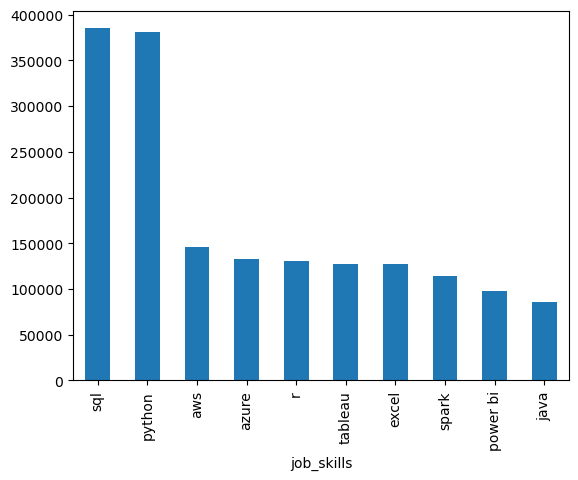

In [19]:
df_exploded= df.explode('job_skills')
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [23]:
skills_count= df_exploded.groupby(['job_skills', 'job_title_short']).size()

In [27]:
df_skills_count= skills_count.reset_index(name= 'skill_count')
df_skills_count= df_skills_count.sort_values(by='skill_count', ascending= False)
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


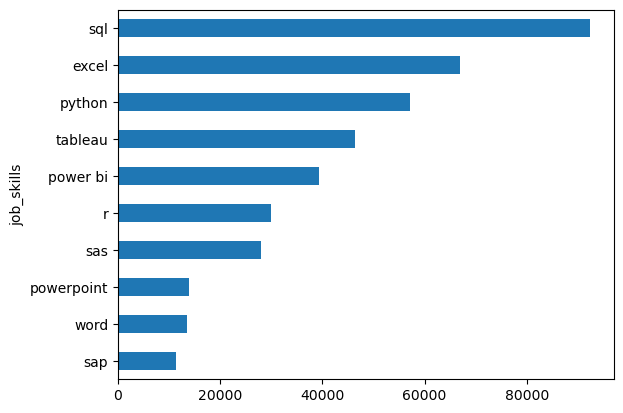

In [32]:
# possiamo anche modificare i dati

job_title= 'Data Analyst'
top_skills= 10

df_skills_final= df_skills_count[df_skills_count['job_title_short']== job_title].head(top_skills)
df_skills_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.legend().set_visible(False)